# Top 100 Words Closest to "Queer" for Joyce

In [21]:
import gensim
import gensim.models
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os
from gensim import corpora
from pprint import pprint
from gensim.test.utils import datapath
from gensim import utils
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

In [22]:
from random import choices
from scipy.spatial.distance import cosine
import numpy as np

In [43]:
# #loading txt file and turning it into courpus

# class MyCorpus:
#     def __iter__(self):
#         corpus_path = datapath('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\joycecorpus.txt')    
#         for line in open(corpus_path, encoding = 'latin-1'):
#             yield gensim.utils.simple_preprocess(line)

# import gensim.models

# sentences = MyCorpus()

In [44]:
# %%time
# model = gensim.models.Word2Vec(sentences, iter=10)

Wall time: 10.2 s


In [45]:
# Save the model
#model.save("joyce_word2vec.model")

In [19]:
# Load the model
#model = gensim.models.Word2Vec.load("joyce_word2vec.model")

In [30]:
file = open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\joycecorpus.txt', 'r', encoding = 'latin-1')
data = file.read()
words = data.split()

print('Number of words in text file :', len(words))

Number of words in text file : 417765


In [23]:
def paragraphize(linelist): 
    paragraphlist = []
    sentence = []
    scount = 0
    for line in linelist:
        words = line.strip().split()
        for w in words:
            if not w.endswith('.'):
                sentence.append(w)
            elif scount < 2:
                sentence.append(w)
                scount += 1
            else:
                scount = 0
                sentence.append(w)
                stext = ' '.join(sentence)
                sentence = []
                paragraphlist.append(stext)
    print(len(linelist), len(paragraphlist))
    
    return paragraphlist

In [24]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\joycecorpus.txt', encoding = 'latin-1') as f:
    jlines = f.readlines()

In [25]:
jparagraphs = paragraphize(jlines)

33647 9609


In [26]:
for i in range(1):
    jsample = choices(jparagraphs, k = len(jparagraphs))
    class MyCorpus:
            def __iter__(self):
                global jsample    
                for line in jsample:
                    yield gensim.utils.simple_preprocess(line)

    sentences = MyCorpus()

In [27]:
%%time
model = gensim.models.Word2Vec(sentences, iter=100)

Wall time: 1min 12s


In [20]:
len(model.wv.vocab)

7375

In [3]:
vector = model.wv['queer']  # get numpy vector of queer

In [4]:
sims = model.wv.most_similar('queer', topn=100)  # get top100 similar words
sims

[('nun', 0.3792240619659424),
 ('powdered', 0.3705107867717743),
 ('altogether', 0.3369549512863159),
 ('cheese', 0.3358839750289917),
 ('pack', 0.33264657855033875),
 ('prefect', 0.32653456926345825),
 ('cuckoo', 0.3261905908584595),
 ('soft', 0.32115882635116577),
 ('suggested', 0.3194236755371094),
 ('cracked', 0.31320178508758545),
 ('beds', 0.3108353018760681),
 ('shocked', 0.30936580896377563),
 ('taylor', 0.30912548303604126),
 ('boiled', 0.30222538113594055),
 ('bands', 0.29382309317588806),
 ('wells', 0.28951042890548706),
 ('bath', 0.2879488468170166),
 ('relief', 0.2868059575557709),
 ('clean', 0.28262627124786377),
 ('cissy', 0.2799057960510254),
 ('roast', 0.2779049575328827),
 ('different', 0.27579188346862793),
 ('loafer', 0.2747100591659546),
 ('stinking', 0.2744004726409912),
 ('out', 0.27226200699806213),
 ('mutton', 0.27018246054649353),
 ('delicate', 0.26971015334129333),
 ('thorns', 0.26944470405578613),
 ('rosy', 0.2676074504852295),
 ('dark', 0.2675609886646271),

In [5]:
import pandas as pd
df = pd.DataFrame(sims) # make sims a dataframe
df_new = df.rename(columns={'words': '0', 'similarity score': '1'})

In [6]:
joyce_queersimilar = df_new[0].tolist()
#joyce_queersimilar # get top 100 words as a list
joyce_queersimilar.append('queer')
#add 'queer' to list

### Catagorizing Sentiments from a List of Top 100 Words Closest to Queer

In [7]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liunegative.txt', encoding = 'utf-8') as f:
    negative_words = [x.strip() for x in f.readlines()]
    
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liupositive.txt', encoding = 'utf-8') as f:
    positive_words = [x.strip() for x in f.readlines()]

In [8]:
%matplotlib notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [9]:
#turn my list into a data frame where each row represents an embedding.

vectordict = dict()
for v in joyce_queersimilar:
    vectordict[v] = model.wv[v]

In [10]:
vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
vectordf.tail(100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
powdered,-0.933830,1.141453,-1.012777,2.539519,-1.559939,1.444476,0.428753,1.299245,2.251332,-0.868407,...,1.502722,2.123991,1.894163,-1.629735,-0.913046,0.516388,2.659313,-0.341370,-0.086017,0.309216
altogether,1.913846,-3.443043,-4.296392,-0.121836,-0.690791,-3.493561,-4.544623,-6.117619,-2.245131,0.669883,...,-0.770384,-2.569502,-1.745955,-0.058855,-0.180264,2.455851,1.765879,-3.341234,1.149521,2.680735
cheese,-0.449509,2.405922,-1.016425,2.388825,3.112796,0.917630,-1.469299,-1.166672,-1.283440,1.279569,...,1.981883,-0.321775,1.570716,0.533283,2.232507,1.394424,1.750331,-1.810937,-1.020766,1.241475
pack,1.443360,1.929692,-3.009997,1.617456,1.956193,1.472403,-1.811586,0.832457,-1.949025,0.090557,...,-0.855034,-2.997726,2.896393,0.001555,1.157417,4.076062,2.867193,-3.118176,-2.545675,-0.551443
prefect,-0.746257,-3.296983,-6.148766,-1.394444,-1.067213,-5.780226,-3.716257,-5.959996,-0.942664,3.838969,...,-1.509507,-7.032062,-3.032628,-2.139087,-2.947538,2.264047,1.448866,-0.739820,-1.275162,-1.163075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
healing,2.606952,1.657132,-1.722772,3.085543,-0.215101,0.311933,-1.269140,1.351454,1.720949,-0.868833,...,-1.508616,-0.062080,-0.165796,-4.955496,-0.743619,-1.102905,0.175937,-0.081965,-0.118588,-0.803177
hid,-2.265407,4.392911,0.935861,1.725302,3.613005,-0.827209,1.761149,-1.231729,-2.585566,0.800323,...,-1.265186,0.184962,2.433703,-1.516904,4.794653,-1.551797,1.197617,-3.544159,0.523652,-3.496358
holy,-0.130573,-2.781948,-5.075155,5.127987,-0.347459,-6.301105,-2.380318,-7.266006,-5.982845,-1.171150,...,3.517717,1.503641,-0.939075,4.792769,5.137997,4.610091,-2.033078,-1.687723,-6.824644,1.886469
before,3.836443,-2.820929,-6.195024,1.302580,-5.957487,-0.556521,-4.085053,2.784502,-1.146385,4.892702,...,-1.386409,-2.936295,2.419613,-3.928542,-2.324799,-0.676478,-2.573509,2.434299,-0.657210,-6.018751


In [11]:
#use dimension-reduction techniques to flatten it into a plane
def vocab2pca(joyce_queersimilar):
    
    vectordict = dict()
    for v in joyce_queersimilar:
        vectordict[v] = model.wv[v]
        
    vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
    
    vectorlengths = np.linalg.norm(vectordf, ord = 2, axis = 1)   # normalize vector lengths
    vectordf = vectordf.divide(vectorlengths, axis = 'rows')      # for PCA
    
    pca = PCA(n_components = 2)       
    components = pca.fit_transform(vectordf)                      # perform PCA
    plotframe = pd.DataFrame({'x': components[ : , 0], 'y': components[ : , 1]}, index = joyce_queersimilar)
    
    return plotframe

In [12]:
plotframe = vocab2pca(joyce_queersimilar)
plotframe

,x,y
nun,-0.000331,0.363949
powdered,-0.186597,-0.047800
altogether,0.061875,0.010090
cheese,0.123073,0.190032
pack,-0.005485,0.017445
...,...,...
healing,-0.173624,-0.020856
hid,0.083684,-0.323048
holy,-0.037235,0.310277
before,-0.027702,0.118246


In [13]:
negativelist_joyce = [w for w in joyce_queersimilar if w in negative_words]
#negativelist_joyce.remove('queer')
positivelist_joyce = [w for w in joyce_queersimilar if w in positive_words]
neutrallist_joyce = [w for w in joyce_queersimilar if w not in (negative_words + positive_words)]

In [14]:
plotframe_negative_joyce = vocab2pca(negativelist_joyce)
plotframe_positive_joyce = vocab2pca(positivelist_joyce)
plotframe_neutral_joyce = vocab2pca(neutrallist_joyce)
plotframe_negative_joyce
plotframe_queer_joyce = plotframe_negative_joyce[(plotframe_negative_joyce.index == 'queer')] #save 'queer' in separate dataframe
plotframe_negative_joyce = plotframe_negative_joyce.drop(['queer']) #drop 'queer' from plotframe_negative_joyce
plotframe_negative_joyce['sentiment']='negative' #add sentiment columns 
plotframe_positive_joyce['sentiment']='positive'
plotframe_neutral_joyce['sentiment']='neutral'
plotframe_queer_joyce['sentiment']='queer'
plotframe_sentiment = pd.concat([plotframe_negative_joyce,plotframe_positive_joyce,plotframe_neutral_joyce,plotframe_queer_joyce]) #combine dataframes for plot
plotframe_sentiment

,x,y,sentiment
cracked,0.424684,-0.222949,negative
shocked,-0.531433,0.252255,negative
dark,-0.386832,-0.115410,negative
sly,-0.434099,-0.281310,negative
sick,-0.063958,-0.455356,negative
...,...,...,...
no,-0.340065,-0.218775,neutral
healing,-0.183532,0.004510,neutral
hid,0.123828,0.098071,neutral
before,-0.054882,-0.080514,neutral


### Visualization

In [28]:
def plot_the_frame(plotframe_sentiment):    
    plt.figure(figsize = (20, 22))
    color_dict = dict({'positive':'green', 'neutral':'blue','negative':'red','queer':'purple'})
    theplot = sns.scatterplot(x = plotframe_sentiment.iloc[ : , 0], y = plotframe_sentiment.iloc[ : , 1], hue=plotframe_sentiment.iloc[ : , 2], palette=color_dict)
    collabels = plotframe_sentiment.columns.tolist()
    theplot.set(xlabel = collabels[0], ylabel = collabels[1])


    for rownum in range(plotframe_sentiment.shape[0]):
        x = plotframe_sentiment.iloc[rownum, 0]
        y = plotframe_sentiment.iloc[rownum, 1]
        theplot.text(x + 0.003, y + .003, 
        plotframe_sentiment.index[rownum], horizontalalignment='left', 
        size='small', color='black', fontsize=10, weight='semibold')

    plt.title('Sentiments of the Top 100 Words Closest to Queer (Joyce)', fontsize=15)
    plt.savefig('queersentiment_joyce_04282022.png')
    plt.show()

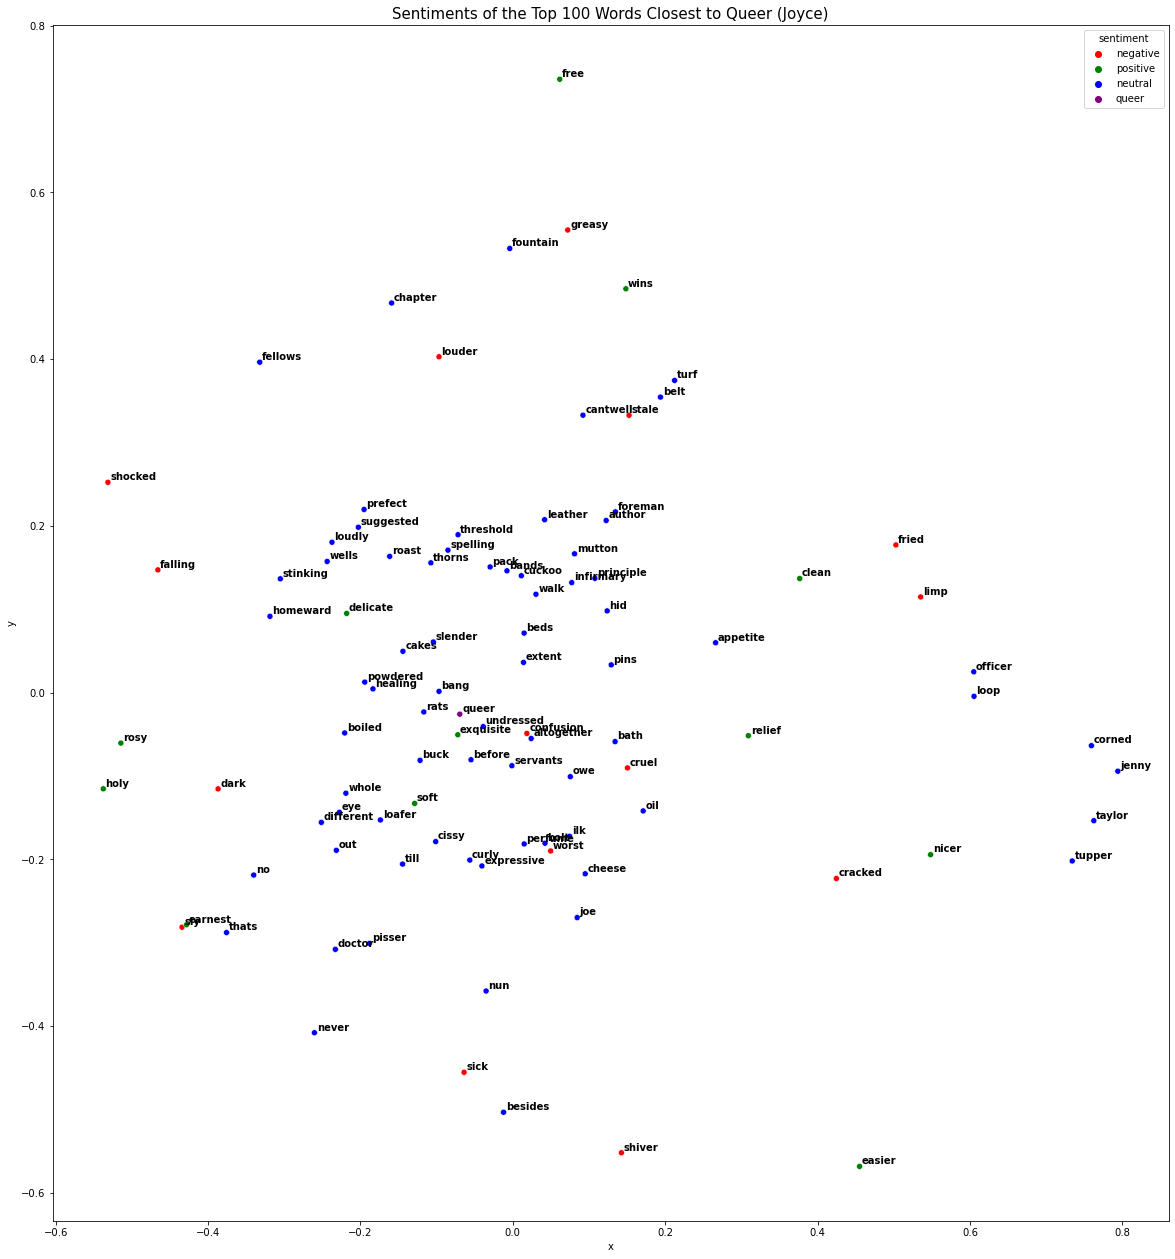

In [29]:
plot_the_frame(plotframe_sentiment)